# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

# Choose the dataset
We choose to analyze the crime data of New York City. You can also access the dataset via:http://us-city.census.okfn.org/entry/newyorkcity/crime-stats. This dataset is being updated quarterly and is available at the incident level. The data set contains open crime data that helps communities make informed judgements about public safety.

Firstly, we download the dataset, rename the dataset and transfer into csv look:

In [1]:
!wget https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv?accessType=DOWNLOAD

--2016-11-11 10:52:12--  https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [    <=>               ] 185.12M  2.46MB/s   in 77s    

Last-modified header invalid -- time-stamp ignored.
2016-11-11 10:53:30 (2.39 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [194111037]



## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [2]:
!mv rows.csv?accessType=DOWNLOAD crime.csv

In [3]:
!csvcut crime.csv | head -10 | csvlook

|-----------+------------+------------------------+-------------+------------------+----------------+-----------------+-----------------+----------------+--------------+---------------+--------------------------------+------------------------+--------+----------+-----------+---------------------+-------------+-------------+----------------------------------------|
|  OBJECTID | Identifier | Occurrence Date        | Day of Week | Occurrence Month | Occurrence Day | Occurrence Year | Occurrence Hour | CompStat Month | CompStat Day | CompStat Year | Offense                        | Offense Classification | Sector | Precinct | Borough   | Jurisdiction        | XCoordinate | YCoordinate | Location 1                             |
|-----------+------------+------------------------+-------------+------------------+----------------+-----------------+-----------------+----------------+--------------+---------------+--------------------------------+------------------------+--------+----------+---

In [4]:
!wc -l crime.csv

1123466 crime.csv


Cleaning the data, i.e replacing all the empty values by data_na

In [5]:
!perl -pe 's;^,|,$|(?<=,),;data_n\/a,;g' crime.csv > crime_refined.csv

In [6]:
!csvcut -n crime_refined.csv

  1: OBJECTID
  2: Identifier
  3: Occurrence Date
  4: Day of Week
  5: Occurrence Month
  6: Occurrence Day
  7: Occurrence Year
  8: Occurrence Hour
  9: CompStat Month
 10: CompStat Day
 11: CompStat Year
 12: Offense
 13: Offense Classification
 14: Sector
 15: Precinct
 16: Borough
 17: Jurisdiction
 18: XCoordinate
 19: YCoordinate
 20: Location 1


We have 1123466 samples and 20 columns.

In [7]:
!perl -pe 's;^,|,$|(?<=,),;data_n\/a,;g' crime.csv > crime_refined.csv

In [8]:
!csvcut -n rape.csv 

[Errno 2] No such file or directory: 'rape.csv'


In [9]:
!wc -l rape.csv

wc: rape.csv: No such file or directory


Finally, we have a dataset that we want to work with: 13780 observations and 13 columns. Them we will keep exploring these data.

#### Here we will post the meaning of each column:

  1.2: ObjectId and Identifer are unique numbers assigned to each case,
  
  3: Occurrence Date: represent the date and time when the rape offenses happen
  
  4: Day of Week: Text representation of day of week on which the incident occurred
  
  5: Occurrence Month: Three character abbreviation of month in which the incident occurred
  
  6: Occurrence Day: Integer representation of day of month in which the incident occurred
  
  7: Occurrence Year: Integer representation of year in which the incident occurred
  
  8: Occurrence Hour: Integer representation of time when the incident occurred; based on 24 hour clock
  
  9: CompStat Month: Three character abbreviation of month in which the incident was reported
 
  10: CompStat Day: Integer representation of day of month in which the incident was reported
 
  11: CompStat Year: Integer representation of year in which the incident was reported
  
  12: Offense: Type of offense; currently aligned with the FBIs seven major felonies. GLMV is the same as Grand Larceny of Motor Vehicle
  
  13: Offense Classification: Level of offense; felony, misdemeanor, violation
  
  14: Sector: Single character indicating patrol sector within given precinct
  
  15: Precinct: Three character representation of precinct in which incident occurred
  
  16: Borough: Text representation of borough in which incident occurred
 
  17: Jurisdiction: Internal jurisdiction responsible for incident (eg. NYPD, Transit or Housing)
 
  18: XCoordinate: X-Coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, Units feet (FIPS 3104)
 
  19: YCoordinate: Y-Coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, Units feet (FIPS 3104)

  20: location: Latitude and Longitude Coordinates of the offenses in Global Coordinate System


#### We are using these data to answer following questions:

1.What's the specific geolocation of rape by time?

2.What's the specific geolocation of rape by authoriy?

3.What's the specific geolocation of rape by district?



#### Filter the data
Initially, we have information reagarding many types of offenses, but we only want to discuss abou the rape. Therefore, we firstly filter out information about other ofenses. We Transfer all the data regarding the offesnse of Rape into rape.csv

Then, there is 20 columns, but we are not gonna use all of them. we extract the columns that we are interested in -- Colums that shows the time, authority and the location of rape offenses. The reason that we are interested in these information is because we can use these 3 dimension to describe the geolocation of rape offense by time, district, authority.
Then we transer the subset into csvlook.

We plan to remove the ObjectID, IDdentifier as they are will not help us in any data analysis, Also removing the offense table as all of them are RAPE and offense classification as all of them are felony. Also removing CompStat as it is the time when the data was entered into the NY map system.



In [10]:
!wc -l crime_refined.csv

1123466 crime_refined.csv


In [11]:
!csvcut crime_refined.csv | csvgrep -c12 -m 'RAPE' > rape.csv

In [12]:
!wc -l rape.csv

13780 rape.csv


In [13]:
!csvcut -c3,4,5,6,7,8,14,15,16,17,20 rape.csv > rape_final.csv

In [ ]:
!csvcut -n rape_final.csv 

In [ ]:
!csvstat rape_final.csv

In [ ]:
!wc -l rape_final.csv

Finally, we have ....data and ...variables to work with.

#### In this dataset, there are null values in some colums:

1.Occurrence Date

2.Day of Week

3.Occurrence Month

4.Occurrence Day

5.Occurrence Year

6.Occurrence Hour

7.Sector

#### We are using these data to answer following questions:

1.What is the geolocation of rape by authority?
2.What is the geolocation of rape by time and date?
3.What is the geolocation of rape by location?

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [ ]:
%load_ext sql

In [ ]:
!echo 'redspot' | sudo -S service postgresql restart

In [ ]:
!createdb -U dbuser Project2

In [ ]:
%sql postgresql://dbuser@localhost:5432/Project2

Creating the source table which has all our data. Copying the data from the csv to the sql table

In [ ]:
%%sql
DROP TABLE IF EXISTS rapecrimes;
CREATE TABLE rapecrimes (
    date CHAR(25),
    day CHAR(9),
    month CHAR(10),
    day_n CHAR(10),
    year CHAR(10),
    hour CHAR(5),
    sector CHAR(10),
    precint INT,
    borough CHAR(19),
    jur char(19),
    location POINT
    )

In [12]:
%%sql
COPY rapecrimes FROM '/home/jovyan/work/rape_final.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

13779 rows affected.


[]

In [13]:
%%sql
select * from rapecrimes
LIMIT 10;

10 rows affected.


date,day,month,day_n,year,hour,offense,sector,precint,borough,jur,xcor,ycor
1994-08-08 18:00:00,Monday,Aug,8,1994,18,RAPE,A,103,QUEENS,N.Y. POLICE DEPT,1041749,196938
1995-02-01 08:00:00,Wednesday,Feb,1,1995,8,RAPE,G,83,BROOKLYN,N.Y. POLICE DEPT,1006965,193571
2000-01-09 20:00:00,Sunday,Jan,9,2000,20,RAPE,G,108,QUEENS,N.Y. POLICE DEPT,996793,210001
2001-01-09 15:00:00,Tuesday,Jan,9,2001,15,RAPE,H,63,BROOKLYN,N.Y. HOUSING POLICE,1000448,168068
2001-02-11 00:01:00,Sunday,Feb,11,2001,0,RAPE,B,25,MANHATTAN,N.Y. POLICE DEPT,1000555,230994
2001-11-19 12:00:00,Monday,Nov,19,2001,12,RAPE,G,75,BROOKLYN,N.Y. POLICE DEPT,1017141,183798
2002-07-25 12:00:00,Thursday,Jul,25,2002,12,RAPE,A,101,QUEENS,N.Y. POLICE DEPT,1053678,159044
2002-07-30 12:00:00,Tuesday,Jul,30,2002,12,RAPE,E,47,BRONX,N.Y. POLICE DEPT,1026387,262634
2002-10-15 07:00:00,Tuesday,Oct,15,2002,7,RAPE,C,79,BROOKLYN,N.Y. POLICE DEPT,999634,190253
2002-11-25 00:01:00,Monday,Nov,25,2002,0,RAPE,B,17,MANHATTAN,N.Y. POLICE DEPT,992411,215025


In [ ]:
%%sql
SELECT count(*) FROM rapecrimes

All the data has been transferred. 

The date,month, day_n, year,hour are time related and combine into one dimension, which can tell us a lot about the occurence of the crime.

We can find out on which days the maximum occurences have happened, or what is the trend of the occurences year by year. In a day what time is more prone to these occurences. Or is all of it just extremely random.

The sector and borough coloumns are also pretty interesting as it tells us which areas are more prone to the occurences and hence need more protection.

Also the precint and jurisdiction tells us under whose authority does the offence fall, and can tell us the load work of these authorities.

The location is the occurence of the crime, and is a countable value.

Exploring the data graphically below.

### Now we will do some simple queries:

#### 1. In which years does the rape tend to happen most frequently?

In [16]:
%%sql
select year,count(*) from rapecrimes
GROUP BY year
ORDER BY count desc
LIMIT 5;

5 rows affected.


year,count
2006,1520
2011,1382
2012,1372
2010,1351
2013,1294


<Container object of 5 artists>

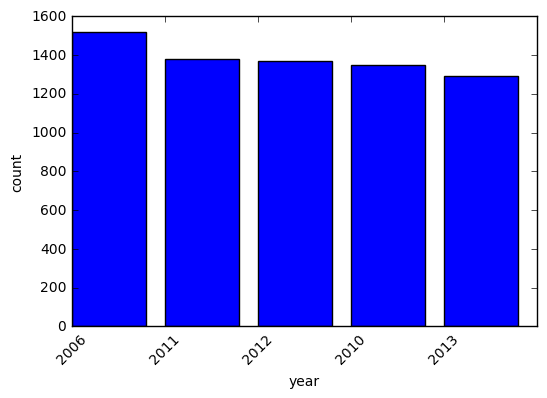

In [17]:
import matplotlib as plt
result = _
result.bar()

#### 2. In which day of the week does the rape tend to happen most frequently?

In [18]:
%%sql
SELECT day,count(*) FROM rapecrimes
GROUP BY day
ORDER BY count desc
LIMIT 5

5 rows affected.


day,count
Saturday,2312
Sunday,2255
Friday,2067
Monday,1831
Thursday,1776


<Container object of 5 artists>

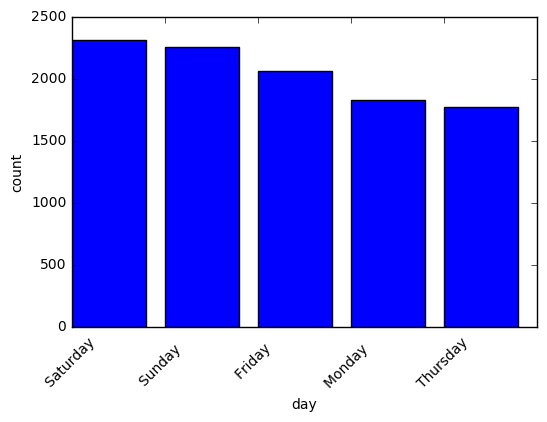

In [19]:
import matplotlib as plt
result = _
result.bar()

#### 3. In which month does the rape tend to happen most frequently?

In [20]:
%%sql
SELECT month,count(*) FROM rapecrimes
GROUP BY month
ORDER BY count desc
LIMIT 5

5 rows affected.


month,count
Jan,1414
Jul,1299
Aug,1268
Jun,1266
Oct,1166


<Container object of 5 artists>

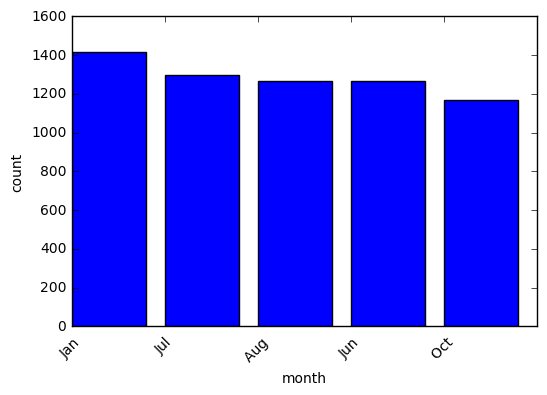

In [21]:
import matplotlib as plt
result = _
result.bar()

#### 4. In which area does the rape tend to happen most frequently?

In [22]:
%%sql
SELECT borough,count(*) FROM rapecrimes
GROUP BY borough
ORDER BY count desc
LIMIT 5

5 rows affected.


borough,count
BROOKLYN,4097
QUEENS,3182
BRONX,3018
MANHATTAN,2941
STATEN ISLAND,541


<Container object of 5 artists>

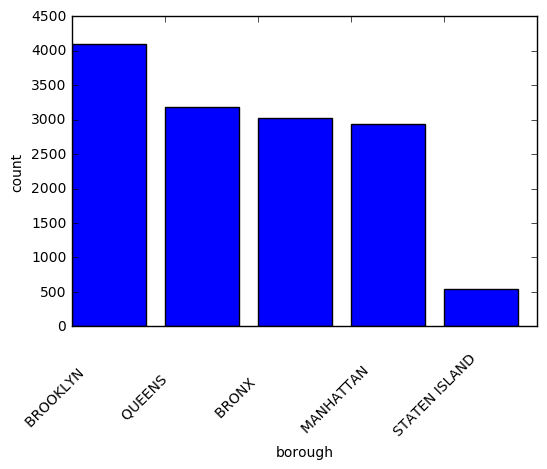

In [23]:
import matplotlib as plt
result = _
result.bar()

#### 5. In which jurisdiction does the rape tend to happen most frequently?

In [24]:
%%sql
SELECT jur,count(*) FROM rapecrimes
GROUP BY jur
ORDER BY count desc
LIMIT 5

5 rows affected.


jur,count
N.Y. POLICE DEPT,12183
N.Y. HOUSING POLICE,1497
N.Y. TRANSIT POLICE,34
POLICE DEPT NYC,16
OTHER,14


<Container object of 5 artists>

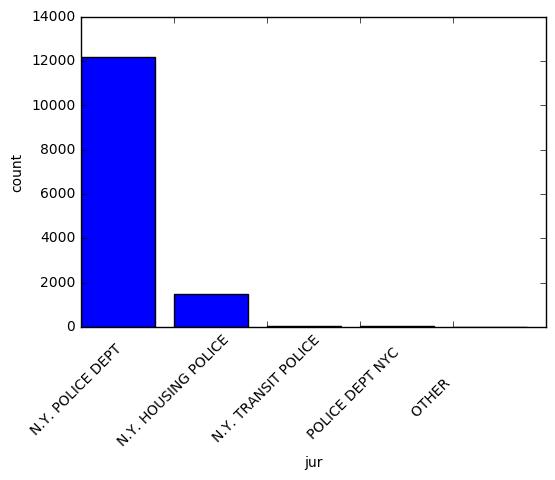

In [25]:
import matplotlib as plt
result = _
result.bar()

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

#### Star Schema Design

Our model consists of one fact and three dimension tables. The fact table has the co-ordinates of the location where the offense occured, The dimesnion tables are as follows:
1. Location : Consists of the sector and borough where the offense happened 
2. Authority : Under whose authority is the offense occured
2. Time : The complete time history of the occurening of the offense

In [30]:
!csvcut -c3,4,5,6,7,8,9,10,11,14,15,16,17,18,19,20 rape.csv > rape_final.csv

In [31]:
%%sql
DROP TABLE IF EXISTS rapecrimes;
CREATE TABLE rapecrimes (
    date TIMESTAMP,
    day CHAR(9),
    month CHAR(4),
    day_n INT,
    year INT,
    hour CHAR(5),
    c_month CHAR(4),
    c_day_n INT,
    c_year INT,
    sector CHAR(4),
    precint INT,
    borough CHAR(19),
    jur char(19),
    xcor BIGINT,
    ycor BIGINT,
    location POINT
    )

Done.
Done.


[]

In [32]:
%%sql
COPY rapecrimes FROM '/home/jovyan/work/rape_final.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

13779 rows affected.


[]

In [33]:
%%sql
select * from rapecrimes
LIMIT 3;

3 rows affected.


date,day,month,day_n,year,hour,c_month,c_day_n,c_year,sector,precint,borough,jur,xcor,ycor,location
1994-08-08 18:00:00,Monday,Aug,8,1994,18,7,31,2008,A,103,QUEENS,N.Y. POLICE DEPT,1041749,196938,"(40.707047475,-73.792611904)"
1995-02-01 08:00:00,Wednesday,Feb,1,1995,8,3,6,2009,G,83,BROOKLYN,N.Y. POLICE DEPT,1006965,193571,"(40.697963515,-73.9180833619999)"
2000-01-09 20:00:00,Sunday,Jan,9,2000,20,11,6,2006,G,108,QUEENS,N.Y. POLICE DEPT,996793,210001,"(40.7430801680001,-73.954736461)"


#### Dimension 1: Authority: Create dimension location_table to describe the sector and borough 

In [44]:
%%sql
DROP TABLE IF EXISTS location_table;
CREATE TABLE location_table (
    borough CHAR(19),
    location_key SERIAL PRIMARY KEY
);


Done.
Done.


[]

In [45]:
%%sql
INSERT INTO location_table (borough)
SELECT DISTINCT borough FROM rapecrimes
;

5 rows affected.


[]

In [46]:
%%sql
select * from location_table

5 rows affected.


borough,location_key
QUEENS,1
MANHATTAN,2
BRONX,3
BROOKLYN,4
STATEN ISLAND,5


#### Dimension 2:  Location: Create dimension authority_table to describe the jurisdiction

In [53]:
%%sql
DROP TABLE IF EXISTS authority_table;
CREATE TABLE authority_table (
    jur char(19),
    authority_key SERIAL PRIMARY KEY
);

Done.
Done.


[]

In [54]:
%%sql
INSERT INTO authority_table (jur)
SELECT DISTINCT jur FROM rapecrimes
;

14 rows affected.


[]

In [55]:
%%sql
select * from authority_table

14 rows affected.


jur,authority_key
N.Y. POLICE DEPT,1
HEALTH & HOSP CORP,2
N.Y. STATE POLICE,3
METRO NORTH,4
U.S. PARK POLICE,5
PORT AUTHORITY,6
DEPT OF CORRECTIONS,7
(null),8
N.Y. HOUSING POLICE,9
OTHER,10


#### Dimension 3:  Time: Create dimension time_table to describe the date and time

In [67]:
!csvcut -c1,2,3,4,5,6 rape_final.csv > rape_time.csv

In [80]:
%%sql
DROP TABLE IF EXISTS time_table;
CREATE TABLE time_table (
    date TIMESTAMP,
    day CHAR(9),
    month CHAR(4),
    day_n INT,
    year INT,
    hour CHAR(5)
    )

Done.
Done.


[]

In [81]:
%%sql
COPY time_table FROM '/home/jovyan/work/rape_time.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

13779 rows affected.


[]

In [82]:
%%sql
ALTER TABLE time_table
ADD time_key SERIAL PRIMARY KEY

Done.


[]

In [83]:
%%sql
SELECT * FROM time_table 
LIMIT 10;

10 rows affected.


date,day,month,day_n,year,hour,time_key
1994-08-08 18:00:00,Monday,Aug,8,1994,18,1
1995-02-01 08:00:00,Wednesday,Feb,1,1995,8,2
2000-01-09 20:00:00,Sunday,Jan,9,2000,20,3
2001-01-09 15:00:00,Tuesday,Jan,9,2001,15,4
2001-02-11 00:01:00,Sunday,Feb,11,2001,0,5
2001-11-19 12:00:00,Monday,Nov,19,2001,12,6
2002-07-25 12:00:00,Thursday,Jul,25,2002,12,7
2002-07-30 12:00:00,Tuesday,Jul,30,2002,12,8
2002-10-15 07:00:00,Tuesday,Oct,15,2002,7,9
2002-11-25 00:01:00,Monday,Nov,25,2002,0,10


#### Create the fact table to store foreign keys and geolocation of rape offenses.

In [112]:
%%sql
DROP TABLE IF EXISTS fact_table;
CREATE TABLE fact_table (
  location_key INT,
  authority_key INT,
  time_key INT,
  location POINT
);

Done.
Done.


[]

In [113]:
%%sql
INSERT INTO fact_table(location)
SELECT location FROM rapecrimes;

;

41337 rows affected.
(psycopg2.ProgrammingError) can't execute an empty query [SQL: ';']


In [114]:
%%sql
SELECT * FROM fact_table
LIMIT 10;

10 rows affected.


location_key,authority_key,time_key,location
None,None,None,"(40.707047475,-73.792611904)"
None,None,None,"(40.697963515,-73.9180833619999)"
None,None,None,"(40.7430801680001,-73.954736461)"
None,None,None,"(40.6279777550001,-73.941647157)"
None,None,None,"(40.800694331,-73.941109286)"
None,None,None,"(40.671106911,-73.881432957)"
None,None,None,"(40.6029515910001,-73.749976261)"
None,None,None,"(40.887451313,-73.847607787)"
None,None,None,"(40.688872153,-73.9445290319999)"
None,None,None,"(40.7568749110001,-73.970544057)"


#### Next step is to join the fact table and the dimension table. 

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.